In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, Sequential

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/Dataset/Image Detection/Dataset/Train'
validation_dir = '/content/drive/MyDrive/Colab Notebooks/Dataset/Image Detection/Dataset/Test'

In [9]:
batch_size = 32
img_height = 128
img_width = 128

In [10]:
from re import sub
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='binary',
    class_names=['infected', 'uninfected'])

Found 416 files belonging to 2 classes.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='binary',
    class_names=['infected', 'uninfected'])

Found 134 files belonging to 2 classes.


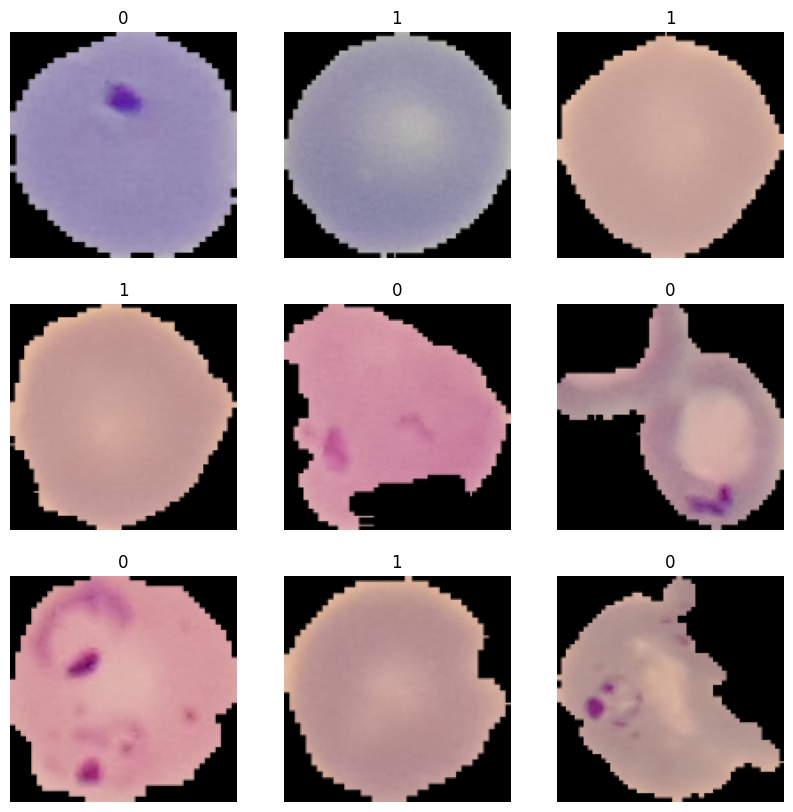

In [12]:
# Visualise the Training Dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(int(labels[i]))
    plt.axis("off")

In [13]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32, 1)


In [14]:
#Standardise the data
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [15]:
# Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
# Train Model
num_classes = 2

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [17]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [18]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
13/13 [==============================] - 41s 2s/step - loss: 0.7060 - accuracy: 0.5601 - val_loss: 0.7110 - val_accuracy: 0.3433
Epoch 2/20
13/13 [==============================] - 9s 643ms/step - loss: 0.6488 - accuracy: 0.6106 - val_loss: 0.6865 - val_accuracy: 0.6716
Epoch 3/20
13/13 [==============================] - 10s 817ms/step - loss: 0.5950 - accuracy: 0.6490 - val_loss: 0.8413 - val_accuracy: 0.3060
Epoch 4/20
13/13 [==============================] - 8s 609ms/step - loss: 0.5248 - accuracy: 0.7067 - val_loss: 0.9282 - val_accuracy: 0.3284
Epoch 5/20
13/13 [==============================] - 9s 666ms/step - loss: 0.5484 - accuracy: 0.6899 - val_loss: 1.1727 - val_accuracy: 0.3284
Epoch 6/20
13/13 [==============================] - 11s 842ms/step - loss: 0.5711 - accuracy: 0.6971 - val_loss: 0.6798 - val_accuracy: 0.5373
Epoch 7/20
13/13 [==============================] - 9s 707ms/step - loss: 0.4805 - accuracy: 0.8125 - val_loss: 0.7453 - val_accuracy: 0.5075
Epoch 

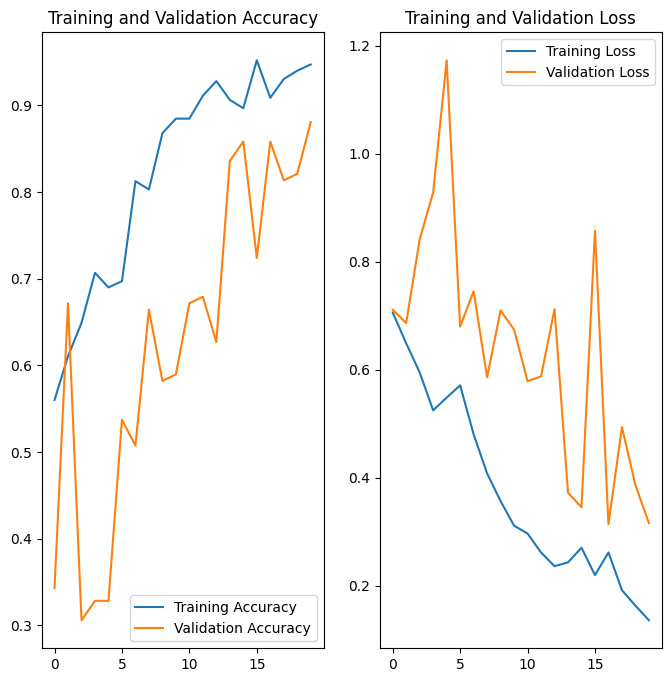

In [19]:
# Visualise training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()